 ---
 # Prática 5: Análisis en el dominio del tiempo (DT) del circuito serie de primer orden R-C. Carga y Descarga de un Condesador.
 ---
> Autores: Jorge del Río López, Carlos González García y Javier Rodríguez Urbano.
>
> Fecha: 2024-11-26
>
> Curso 24-45 
---
<div style="text-align: center;">
    <img src="https://i.pinimg.com/736x/e8/6c/d4/e86cd4446daa867f88666c90ec10b0d4.jpg" alt="Logo" style="width: 20%;"/>
</div>


In [270]:
# Importamos las Dependencias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit


In [271]:
# Importamos el fichero que contiene los datos.
xlsx_name="P5_PlantillaMedidasEstudiantes.ods"

In [272]:
#Creamos una funcion para convertir n listas en arrays.
def ConverArray3 (lista,lista2,lista3):
    return np.array(lista), np.array(lista2),np.array(lista3)

def ConverArray2 (lista,lista2):
    return np.array(lista), np.array(lista2)

#Función que usaremos para calcular errores relativos.
def ErrorRelativo(exp,teor):
    return (abs(exp - teor)/abs(teor))*100


---
<h1 style="text-align: center;">[P5.C1]</h1>

---


In [273]:
# Leemos el archivo
DatosParte1 = pd.read_excel(xlsx_name,sheet_name="RC")

# Extraemos los valores:

ValorResistencia = DatosParte1["R"].tolist()
ValorCondensador = DatosParte1["C"].tolist()


# Extraemos los valores Teóricos y Prácticos.

#--------------------------------------------------------------
#Resistencia
#--------------------------------------------------------------

ResistenciaTeo = ValorResistencia[0]
ResistenciaPra = ValorResistencia[1]

#--------------------------------------------------------------
# Capacidad
#--------------------------------------------------------------

CapacidadTeo = ValorCondensador[0]
CapacidadPra = ValorCondensador[1]


# Calculo del valor del tiempo de Relajación teórico.

TiempoRelajacionTeo = ResistenciaTeo*CapacidadTeo

# Calculo del valor del tiempo de Relajación práctico.

TiempoRelajacionPra = ResistenciaPra*CapacidadPra

print(f'La Resistencia teórica es: {round(ResistenciaTeo,2)} Ohms.')
print(f'La Resistencia práctica es: {round(ResistenciaPra,2)} Ohms.')
print(f'Esto nos proporciona un error relativo del: {round(ErrorRelativo(ResistenciaPra,ResistenciaTeo),2)} %.\n')

print(f'La Capacidad teórica es: {CapacidadTeo} F.')
print(f'La Capacidad práctica es: {CapacidadPra} F.')
print(f'Esto nos proporciona un error relativo del: {round(ErrorRelativo(CapacidadPra,CapacidadTeo),2)} %.\n')


print(f'El tiempo de relajación con los valores teóricos es: {round(TiempoRelajacionTeo,2)} s.')
print(f'El tiempo de relajación con los valores prácticos es: {round(TiempoRelajacionPra,2)} s.')
print(f'Esto nos proporciona un error relativo del: {round(ErrorRelativo(TiempoRelajacionPra,TiempoRelajacionTeo),2)} %.')


La Resistencia teórica es: 10000 Ohms.
La Resistencia práctica es: 9930 Ohms.
Esto nos proporciona un error relativo del: 0.7 %.

La Capacidad teórica es: 0.0047 F.
La Capacidad práctica es: 0.00413 F.
Esto nos proporciona un error relativo del: 12.13 %.

El tiempo de relajación con los valores teóricos es: 47.0 s.
El tiempo de relajación con los valores prácticos es: 41.01 s.
Esto nos proporciona un error relativo del: 12.74 %.


Para la posterior comparacion de valores usaremos el valor del tiempo de relajación calculado a partir de los valores prácticos.

---
<h1 style="text-align: center;">[P5.C2]</h1>

---

En este apartado haremos un ajsute lineal y un ajuste exponencial de los datos,referidos a la carga del condensador que tomamos en el laboratorio.
La ecuacion que seguira el ajuste lineal será:

$log(\dfrac{V_s}{V_s-v_c})\ =\ \dfrac{log(e)}{\tau}\ t -\ \dfrac{t_0}{\tau}log(e) $

donde tomaremos como base del logaritmo el número e.

La ecuación que seguira el ajuste exponencial será:

$v_c(t) = V_s(1- e^{(-\dfrac{(t-t_0)}{\tau})})$

Realizamos un ajuste exponencial, ya que tras realizar el ajuste lineal observamos que los valores obtenidos eran sumamente erroneos, debido a que el ajuste que intentabamos hacer no era lineal.


In [274]:
DatosParte2 = pd.read_excel(xlsx_name,sheet_name="DatosEnTiempo")

# Extraemos los valores:
Tiempo = DatosParte2["t"].tolist()
VoltajeCondensador = DatosParte2["vc"].tolist()

# Extraemos los valores de la fuente.
VoltajeFuenteCONSTANTE = DatosParte2["Vs"].tolist()
VoltajeFuente =  VoltajeFuenteCONSTANTE[0]

# Creamos la variable de TiempoLista y VoltajeList para tener los datos en una lista para el posterior uso de los atributos de lista. 
TiempoLista = Tiempo.copy()
VoltajeCondensadorLista = VoltajeCondensador.copy()

Tiempo, VoltajeCondensador = ConverArray2(Tiempo,VoltajeCondensador)

Datos:
     t[s]  Vc[V]
0       1   0.00
1       2   0.00
2       3   0.21
3       4   0.33
4       5   0.57
..    ...    ...
193   194   9.29
194   195   9.29
195   196   9.30
196   197   9.30
197   198   9.30

[198 rows x 2 columns]

LINEAL

Datos ajuste: Pendiente= 0.01373118079889366 1/s 
Ordenada en el origen:  0.2341604216019739 
 coorel coef= [[ 2.69770922e-08 -2.68422067e-06]
 [-2.68422067e-06  3.55211869e-04]] 

EXPONENCIAL

Datos ajuste: 
Parámetros ajustados: a = 57.0425, b = -0.6971


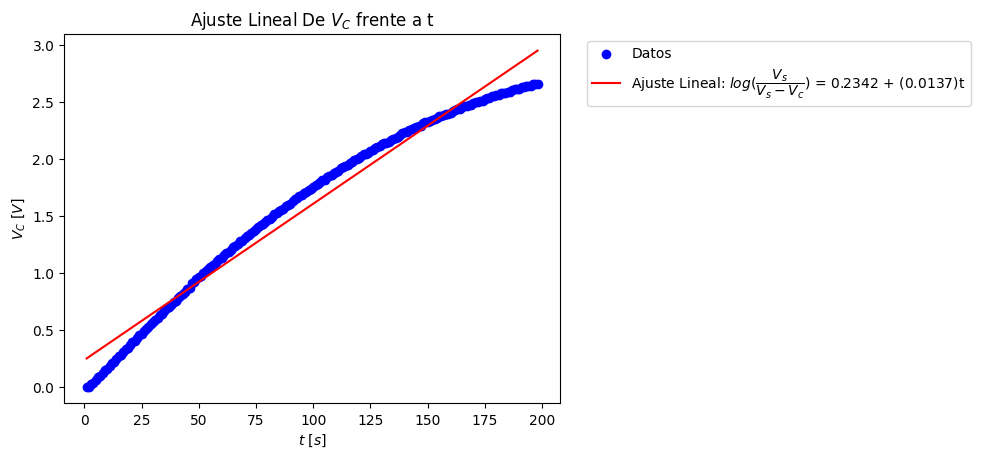

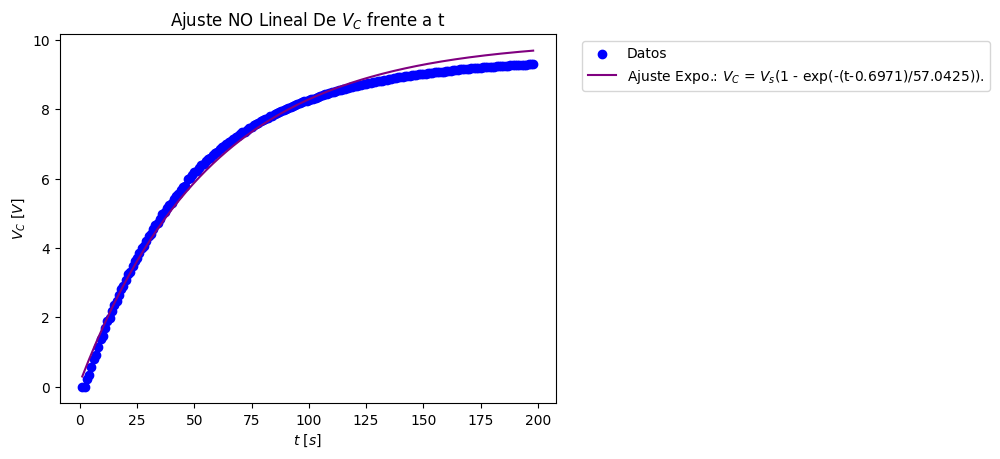

In [275]:
# Separamos los valores de la Carga de los valores de la Descarga

VoltajeCondensadorCarga = VoltajeCondensador[0:198].copy()
VoltajeCondensadorDesCarga = VoltajeCondensador[198:350].copy()

TiempoCarga = Tiempo[0:198].copy()
TiempoDesCarga = Tiempo[198:350].copy()

#----------------------------------------------------------------------------------------------------------------------------------
# Parte LINEAL
#----------------------------------------------------------------------------------------------------------------------------------

# Exponemos los valores del tiempo y el votaje (de la carga) en una tabla.

data = {'t[s]': TiempoCarga,
        'Vc[V]': VoltajeCondensadorCarga}
df = pd.DataFrame(data)
print(f'Datos:\n{df}\n')

# Obtenemos los valores de la abcisas
Ejey_CargaLineal = []
for i in VoltajeCondensadorCarga:
   Ejey_CargaLineal.append(np.log((VoltajeFuente/(VoltajeFuente-i))))


# Realizamos el ajuste lineal con np.polyfit
print("LINEAL\n")
print('Datos ajuste: ',end='')
[PendienteCargaLineal, OrdenadaOrigenCargaLineal], r = np.polyfit(TiempoCarga,Ejey_CargaLineal,deg=1,cov=True)
print("Pendiente=", PendienteCargaLineal,"1/s","\nOrdenada en el origen: ", OrdenadaOrigenCargaLineal,"\n coorel coef=",r,"\n")



# Creamos una función para la línea ajustada
def ajuste_linealCarga(x):
    return PendienteCargaLineal * x + OrdenadaOrigenCargaLineal

#----------------------------------------------------------------------------------------------------------------------------------
# Parte EXPONENCIAL
#----------------------------------------------------------------------------------------------------------------------------------

def exponencialCarga(x,a,b):

    return VoltajeFuente * (1 - np.exp(-(x/a))*np.exp(b/a))

# Ajuste de la curva
Parametros, covariance = curve_fit(exponencialCarga,TiempoCarga,VoltajeCondensadorCarga)

# Parámetros ajustados
a_fit, b_fit = Parametros
print("EXPONENCIAL\n")
print("Datos ajuste: ")
print(f"Parámetros ajustados: a = {a_fit:.4f}, b = {b_fit:.4f}")
                                                                                                                                                            

# Graficamos los datos y el ajuste lineal
plt.scatter(TiempoCarga, Ejey_CargaLineal, label='Datos', color='blue')
plt.plot(TiempoCarga, ajuste_linealCarga(TiempoCarga), color='red', label=fr'Ajuste Lineal: $log(\dfrac{{V_s}}{{V_s - V_c}})$ = {OrdenadaOrigenCargaLineal:.4f} + ({PendienteCargaLineal:.4f})t')
plt.xlabel(r'$t\ [s]$')
plt.ylabel(r'$V_{C} \ [V]$')
plt.title(r'Ajuste Lineal De $V_C$ frente a t')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

plt.scatter(TiempoCarga, VoltajeCondensadorCarga, label='Datos', color='blue')
plt.plot(TiempoCarga, exponencialCarga(TiempoCarga,a_fit,b_fit), color='purple', label=fr'Ajuste Expo.: $V_C$ = $V_s$(1 - exp(-(t{round(b_fit,4)})/{round(a_fit,4)})).')
plt.xlabel(r'$t\ [s]$')
plt.ylabel(r'$V_{C} \ [V]$')
plt.title(r'Ajuste NO Lineal De $V_C$ frente a t')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()




In [276]:
#----------------------------------------------------------------------------------------------------------------------------------
# Parte Lineal
#----------------------------------------------------------------------------------------------------------------------------------

# A partir de los datos de la Ordenada en el origen y de la pendiente obtenemos los valores de C y tau.

TauPracticaCargaLineal =  1 / PendienteCargaLineal

# Calculamos el tiempo t0

Tiempo0 = OrdenadaOrigenCargaLineal*TauPracticaCargaLineal

# Calculamos el valor de C
CapacidadPracticaCarga = TauPracticaCargaLineal/ResistenciaPra

print(f'El tiempo de relajación Teórica es: {round(TauPracticaCargaLineal,2)} s.')
print(f'La capacidad resultante es: {round(CapacidadPracticaCarga,4)} F.')

El tiempo de relajación Teórica es: 72.83 s.
La capacidad resultante es: 0.0073 F.


In [277]:
#----------------------------------------------------------------------------------------------------------------------------------
# Parte Exponencial
#----------------------------------------------------------------------------------------------------------------------------------

# A partir de los datos de la a y b obtenemos los valores de C y tau.

TauPracticaCargaExpo =  a_fit

# Calculamos el tiempo t0

Tiempo0Expo = b_fit
# Calculamos el valor de C
CapacidadPracticaCargaExpo = TauPracticaCargaExpo/ResistenciaPra

print(f'El tiempo de relajación Teórica es: {round(TauPracticaCargaExpo,2)} s.')
print(f'La capacidad resultante es: {round(CapacidadPracticaCargaExpo,4)} F.')

El tiempo de relajación Teórica es: 57.04 s.
La capacidad resultante es: 0.0057 F.


---
<h1 style="text-align: center;">[P5.C3]</h1>

---


En este apartado haremos un ajsute lineal de los datos,referidos a la descarga del condensador, que tomamos en el laboratorio.
La ecuacion que seguira el ajuste lineal será:

$log(\dfrac{v_c}{V_s})\ =\ -\dfrac{log(e)}{\tau}\ t +\ \dfrac{t_1}{\tau}log(e) $


donde tomaremos como base del logaritmo el numero e.


Datos:
     t[s]  Vc[V]
0     199  9.302
1     200  9.244
2     201  9.123
3     202  8.890
4     203  8.665
..    ...    ...
147   346  0.497
148   347  0.486
149   348  0.480
150   349  0.470
151   350  0.459

[152 rows x 2 columns]

LINEAL

Datos ajuste: R= -0.020029119463241866 1/s 
Ordenada en el origen:  3.90867426360618 
 coorel coef= [[ 3.56964536e-10 -9.79867652e-08]
 [-9.79867652e-08  2.75846130e-05]]


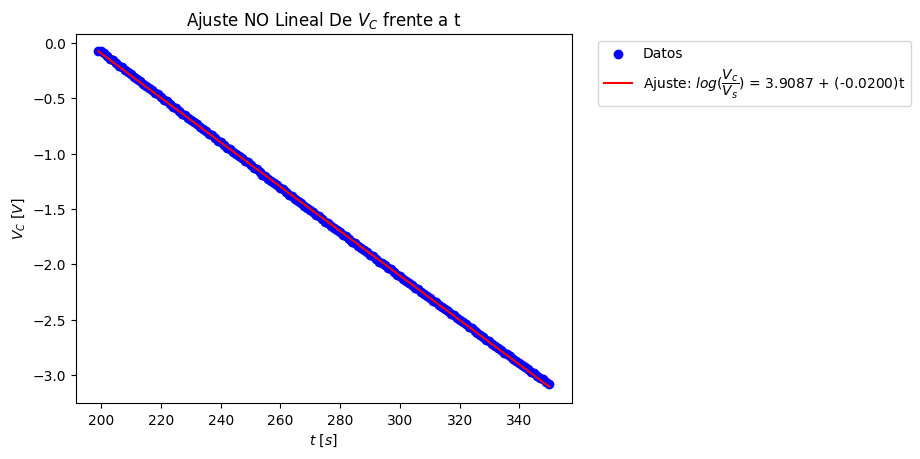

In [278]:
#----------------------------------------------------------------------------------------------------------------------------------
# Parte LINEAL
#----------------------------------------------------------------------------------------------------------------------------------

# Exponemos los valores del tiempo y el votaje (de la carga) en una tabla.
data = {'t[s]': TiempoDesCarga,
        'Vc[V]': VoltajeCondensadorDesCarga}
df = pd.DataFrame(data)
print(f'Datos:\n{df}\n')
# Obtenemos los valores de la abcisas

Ejey_DesCargaLineal = []
for i in VoltajeCondensadorDesCarga:
    Ejey_DesCargaLineal.append(np.log((i/VoltajeFuente)))

# Realizamos el ajuste lineal con np.polyfit
print("LINEAL\n")

print('Datos ajuste: ',end='')
[PendienteDesCargaLineal, OrdenadaOrigenDesCargaLineal], r = np.polyfit(TiempoDesCarga,Ejey_DesCargaLineal,deg=1,cov=True)
print("R=", PendienteDesCargaLineal,"1/s","\nOrdenada en el origen: ", OrdenadaOrigenDesCargaLineal,"\n coorel coef=",r)


# Crear una función para la línea ajustada
def ajuste_linealDesCarga(x):
    return OrdenadaOrigenDesCargaLineal + PendienteDesCargaLineal * x

                                                                                                                                                            
# Graficamos los datos y el ajuste lineal
plt.scatter(TiempoDesCarga, Ejey_DesCargaLineal, label='Datos', color='blue')
plt.plot(TiempoDesCarga, ajuste_linealDesCarga(TiempoDesCarga), color='red', label=fr'Ajuste: $log(\dfrac{{V_c}}{{V_s}})$ = {OrdenadaOrigenDesCargaLineal:.4f} + ({PendienteDesCargaLineal:.4f})t')
plt.xlabel(r'$t\ [s]$')
plt.ylabel(r'$V_{C} \ [V]$')
plt.title(r'Ajuste NO Lineal De $V_C$ frente a t')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

In [279]:
# A partir de los datos de la Ordenada en el origen y de la pendiente obtenemos los valores de C y tau.

TauPracticaDesCargaLineal = - 1/PendienteDesCargaLineal

# Calculamos el tiempo t1
Tiempo1 = OrdenadaOrigenDesCargaLineal *TauPracticaDesCargaLineal

# Calculamos el valor de C
CapacidadPracticaDesCarga = TauPracticaDesCargaLineal/ResistenciaPra

print(f'El tiempo de relajación Teórica es: {round(TauPracticaDesCargaLineal,2)} s.')
print(f'El valor de la Capacidad es: {round(CapacidadPracticaDesCarga,5)} F.')

El tiempo de relajación Teórica es: 49.93 s.
El valor de la Capacidad es: 0.00503 F.


---
<h1 style="text-align: center;">[P5.C4]</h1>

---



In [280]:
# Calculamos los errores relativos para su muestreo.
print(f'Erro relativo Carga:{round(ErrorRelativo(TauPracticaCargaLineal,TiempoRelajacionPra),2)}||{round(ErrorRelativo(TauPracticaCargaExpo,TiempoRelajacionPra),2)}')
print(f'Erro relativo Descarga:{round(ErrorRelativo(TauPracticaDesCargaLineal,TiempoRelajacionPra),2)}')

Erro relativo Carga:77.58||39.09
Erro relativo Descarga:21.74


Ahora nos piden que comparemos los valores de $\tau$. EXPLICAR DE DONDE SALEN (Estan calculados arriba pero decir que uno viene del linel al ser la pendeinte y todo eso)

$\tau_{Carga,Lienal}\ =\ 72.83\ s$

$\tau_{Carga,Exponecial}\ =\ 57.04\ s$

$\tau_{Descarga}\ =\ 49.93\ s$

$\tau_{Práctica}\ =\ 41.00\ s$

Para cada uno de estos valores obtenemos un error relativo, tomando el valor práctico como correcto llegamos a:


$\epsilon_R(Carga,Lineal)\ =\ 77.58 \%$

$\epsilon_R(Carga,Exponencial)\ =\ 39.09 \%$

$\epsilon_R(Descarga)\ =\ 21.74 \% $



---
<h1 style="text-align: center;">[P5.C5]</h1>

---


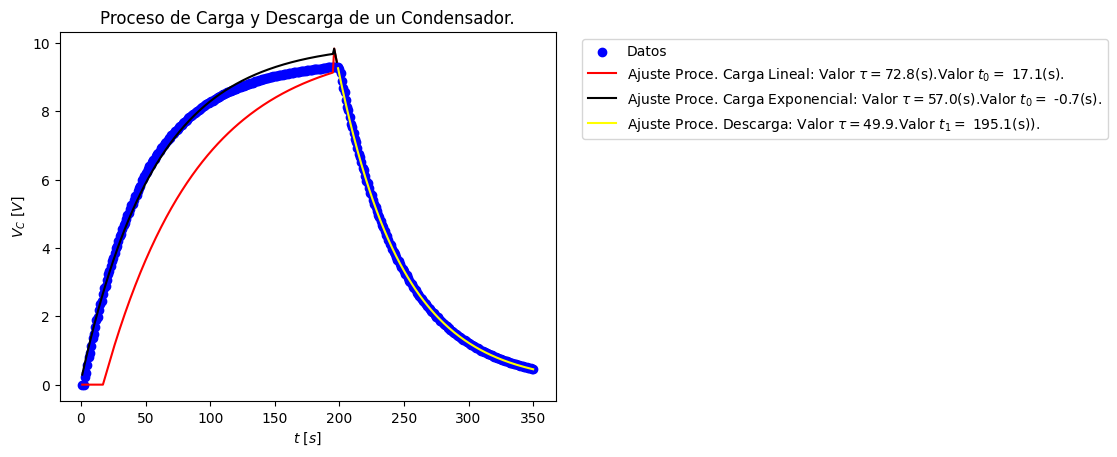

In [281]:
# Creamos las funciones que definen los valores del voltaje dependiendo del valor del Tiempo
def VoltajeCondFUNCION(t):
    if t <= Tiempo0:
        return 0.0
    elif Tiempo0 < t < Tiempo1:
        return(VoltajeFuente*(1-np.exp(-(t-Tiempo0)/(TauPracticaCargaLineal))))
    elif t >= Tiempo1:
        return(VoltajeFuente*(np.exp(-(t-Tiempo1)/(TauPracticaDesCargaLineal))))

def VoltajeCondFUNCIONExpo(t):
    if t <= Tiempo0Expo:
        return 0.0
    elif Tiempo0Expo < t < Tiempo1:
        return(VoltajeFuente*(1-np.exp(-(t-Tiempo0Expo)/(TauPracticaCargaExpo))))
    elif t >= Tiempo1:
        return(VoltajeFuente*(np.exp(-(t-Tiempo1)/(TauPracticaDesCargaLineal))))





# Definimos las listas que guardaran los valores del eje y.
EjeyCarga = []
Ejey_CargaExpo = [] 

EjeyDesCarga = []

# Recorremos los valores de tiempo y calculamos el voltaje correspondiente en cada caso.
for i in TiempoCarga:
    EjeyCarga.append(VoltajeCondFUNCION(i))
    Ejey_CargaExpo.append(VoltajeCondFUNCIONExpo(i))

for i in TiempoDesCarga:
    EjeyDesCarga.append(VoltajeCondFUNCION(i))

# Graficamos los datos recolectados y el ajuste llevado a cabo.
plt.scatter(Tiempo, VoltajeCondensador, label='Datos', color='blue')

plt.plot(TiempoCarga, EjeyCarga, color='red', label=fr'Ajuste Proce. Carga Lineal: Valor $\tau =${TauPracticaCargaLineal:.1f}(s).Valor $t_0 =$ {Tiempo0:.1f}(s).')
plt.plot(TiempoCarga, Ejey_CargaExpo, color='black', label=fr'Ajuste Proce. Carga Exponencial: Valor $\tau =${TauPracticaCargaExpo:.1f}(s).Valor $t_0 =$ {Tiempo0Expo:.1f}(s).')

plt.plot(TiempoDesCarga, EjeyDesCarga, color='yellow', label=fr'Ajuste Proce. Descarga: Valor $\tau =${TauPracticaDesCargaLineal:.1f}.Valor $t_1 =$ {Tiempo1:.1f}(s)).')



plt.xlabel(r'$t\ [s]$')
plt.ylabel(r'$V_{C} \ [V]$')
plt.title('Proceso de Carga y Descarga de un Condensador.')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.show()


En los ajustes anteriores lo que se ha llevado a cabo es usar los valores proporcionados por los ajustes de $\tau$ y del tiempo y meterlos en la formula del voltaje del condensador. 

<h1 style="text-align: center;">MEJORAR LA EXPLIACION DE ESTA PARTE(P5C5)</h1>


---
<h1 style="text-align: center;">[P5.C6]</h1>

---

En este apartado diseñamos y creamos una funcion de python para realizar la transfromada discreta de Fourier, no está diseñado para un uso eficiente, sino casual.

La ecuación de la transformada es: 
$\mathcal{F}_v(f) = \sum_{t=0}^{\infty} v_n \Delta t_n e^{-j 2 \pi t_n f} =\sum_{t=0}^{\infty} v(t_n) \dfrac {t_{n+1}-t_{n-1}}{2} e^{-j 2 \pi t_n f} $


In [282]:
# Creamos la función que nos piden:
def Fourier(v,t,f):
    suma = 0
    N = len(t)
    for j,k in enumerate(t):  
        if j != 0 and j != len(t)-1:
            IncrementoT = (t[j+1]-t[j-1])/2
            suma += v[j] * IncrementoT * np.exp(-1.0j * k * 2 * np.pi * np.abs(f))
    return suma/N # Normalizamos el resultado


---
<h1 style="text-align: center;">[P5.C7]</h1>

---

Este apartado lo hemos subdividido en dos, en el primero observamos la gráfica de la fuente y su Transformada discreta de Fourier, y hacemos lo mismo con el condensador. En la segunda parte nos limitamos a una región de frecuecnicas menor, la que nos proporciona el guión.



EXPLICAR UN PCO MEJOR

In [283]:
# Definimos la funcion de la Fuente para su Posterior uso. Esta función es un pulso cuadrado.
def FuncionVoltageFuente(t):
    if t <= Tiempo0:
        return 0.0
    elif Tiempo0 < t < Tiempo1:
        return(10)
    elif t >= Tiempo1:
        return 0.0

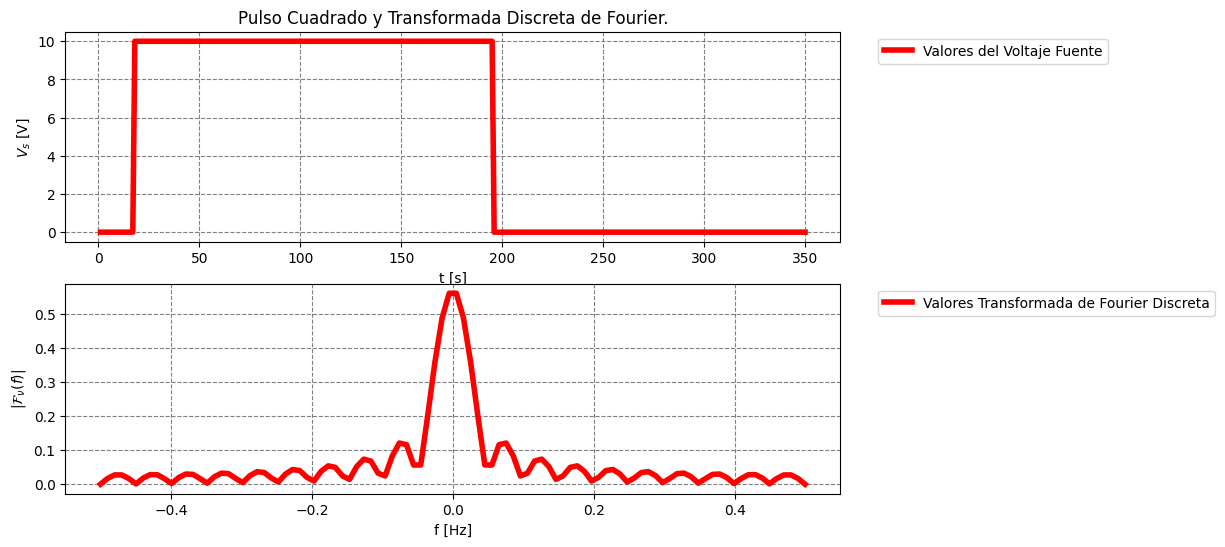

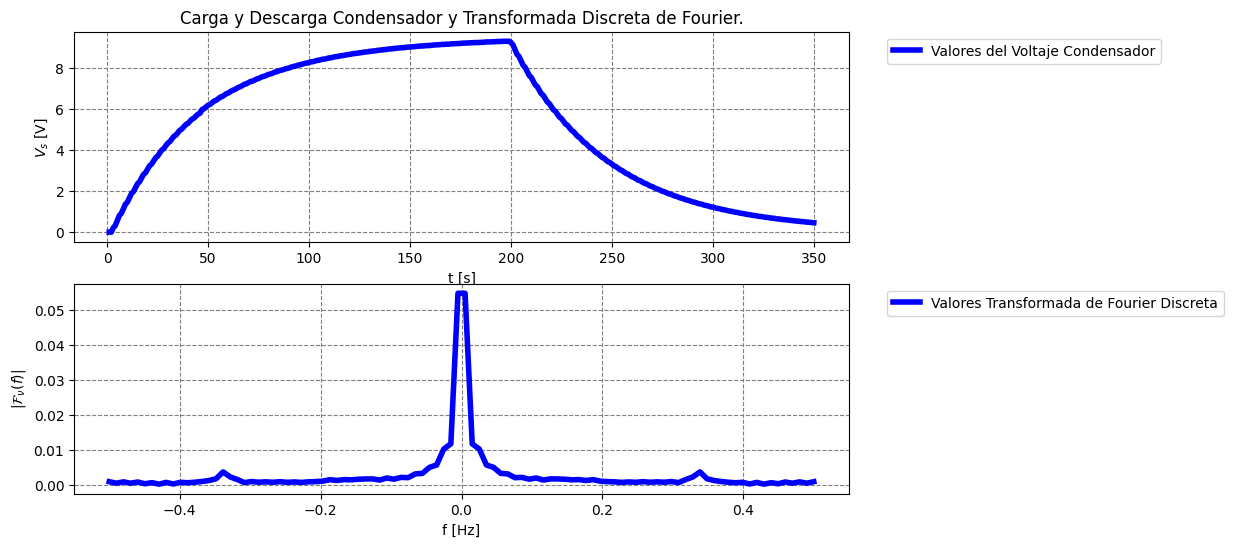

In [284]:
VoltajeFuenteLista=[]

FourierVoltajeConde = []
FourierVoltajeFuente = []

ModuloFuncionCondensador = []
ModuloFuente = []

FaseFuncionCondensador = []
FaseFuente = []

frec = np.linspace(-0.5,0.5,100)

for i in Tiempo:
    VoltajeFuenteLista.append(FuncionVoltageFuente(i))
VoltajeFuenteLista = np.array(VoltajeFuenteLista)

# Calculamos la Transformada discreta de Fourier
for i in frec:
    FourierVoltajeConde.append(Fourier(VoltajeCondensador,Tiempo,i))
    FourierVoltajeFuente.append(Fourier(VoltajeFuenteLista,Tiempo,i))

for i in FourierVoltajeConde:
    ModuloFuncionCondensador.append(np.abs(i))
    FaseFuncionCondensador.append(np.angle(i))
    
for i in FourierVoltajeFuente:
    ModuloFuente.append(np.abs(i))
    FaseFuente.append(np.angle(i))

#----------------------------------------------------------------------------------------------------------------------------------
# Parte Fuente
#----------------------------------------------------------------------------------------------------------------------------------
# 
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(Tiempo, VoltajeFuenteLista,label="Valores del Voltaje Fuente",color="red",lw=4) 

plt.title(r"Pulso Cuadrado y Transformada Discreta de Fourier.")
plt.xlabel(r"t [s]")
plt.ylabel(r"$V_s$ [V]")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, which="both", linestyle="--", color="gray")

plt.subplot(2, 1, 2)
plt.plot(frec, ModuloFuente,label="Valores Transformada de Fourier Discreta",color="red",lw=4)  
plt.ylabel(r"$|\mathcal{F}_\nu (f)|$")
plt.xlabel("f [Hz]")
plt.grid(True, which="both", linestyle="--", color="gray")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.show()


#----------------------------------------------------------------------------------------------------------------------------------
# Parte Condensador
#----------------------------------------------------------------------------------------------------------------------------------

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(Tiempo, VoltajeCondensador,label="Valores del Voltaje Condensador",color="blue",lw=4) 

plt.title(r"Carga y Descarga Condensador y Transformada Discreta de Fourier.")
plt.xlabel(r"t [s]")
plt.ylabel(r"$V_s$ [V]")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, which="both", linestyle="--", color="gray")

plt.subplot(2, 1, 2)
plt.plot(frec, ModuloFuncionCondensador,label="Valores Transformada de Fourier Discreta",color="blue",lw=4)  
plt.ylabel(r"$|\mathcal{F}_\nu (f)|$")
plt.xlabel("f [Hz]")
plt.grid(True, which="both", linestyle="--", color="gray")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.show()


In [285]:
VoltajeFuenteLista=[]

FourierVoltajeConde = []
FourierVoltajeFuente = []

ModuloFuncionCondensador = []
ModuloFuente = []

FaseFuncionCondensador = []
FaseFuente = []

frec = np.linspace(0,0.5,100)

for i in Tiempo:
    VoltajeFuenteLista.append(FuncionVoltageFuente(i))
VoltajeFuenteLista = np.array(VoltajeFuenteLista)

# Calculamos la Transformada discreta de Fourier
for i in frec:
    FourierVoltajeConde.append(Fourier(VoltajeCondensador,Tiempo,i))
    FourierVoltajeFuente.append(Fourier(VoltajeFuenteLista,Tiempo,i))

for i in FourierVoltajeConde:
    ModuloFuncionCondensador.append(np.abs(i))
    FaseFuncionCondensador.append(np.angle(i))
    
for i in FourierVoltajeFuente:
    ModuloFuente.append(np.abs(i))
    FaseFuente.append(np.angle(i))



---
<h1 style="text-align: center;">[P4.C8]</h1>

---

En este apartado nos encragaremos de mostrar el diagram de Bode de la funcion transferecnia correspondiente.

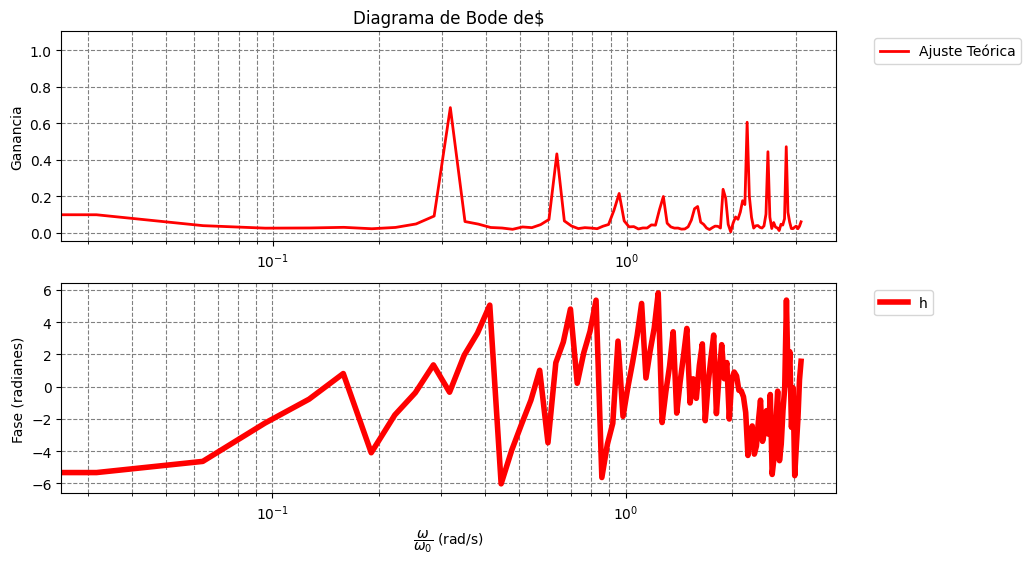

In [286]:

Ganancia = []
Fase = []
FrecuenciaAngu = []
FrecuenciaAnguModulo = []
FrecuenciaAngularPlotear =[]
for i in frec:
    FrecuenciaAngu.append(2*np.pi*i)
"""
j = 0
for i in ModuloFuncionCondensador:
    #Ganancia.append(i/ModuloFuente[j])
    #print((i,ModuloFuente[j]),frec[j])
    #Ganancia.append(20*np.log10(ModuloFuente[j])) 
    #Ganancia.append(20*np.log10(i)) 
    Ganancia.append(20*np.log10(i/ModuloFuente[j]))
    j += 1
    

j = 0
for i in FaseFuncionCondensador:
    if FaseFuente[j] != 0:
        Fase.append(i / FaseFuente[j])
    else:
        Fase.append(0)
    j += 1
    """
Ganancia = [(mf / mf_in) for mf, mf_in in zip(ModuloFuncionCondensador, ModuloFuente)]

Fase = [fase_out - fase_in for fase_out, fase_in in zip(FaseFuncionCondensador, FaseFuente)]

Ganancia.remove(Ganancia[-1])
FrecuenciaAnguModulo = FrecuenciaAngu.copy()
FrecuenciaAnguModulo.remove(FrecuenciaAngu[-1])


# Graficar el diagrama de  Bode - Ganancia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
#plt.plot(frec, Ganancia,label="Ajuste Teórica",color="red",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaAnguModulo, Ganancia,label="Ajuste Teórica",color="red",lw=2)  # Gráfica semilogarítmica

plt.title(r"Diagrama de Bode de$")
plt.ylabel("Ganancia")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, which="both", linestyle="--", color="gray")

# Graficar el Bode - Fase (radianes)
plt.subplot(2, 1, 2)
plt.semilogx(FrecuenciaAngu, Fase,label="h",color="red",lw=4)  # Gráfica semilogarítmica
plt.ylabel("Fase (radianes)")
plt.xlabel(r"$\dfrac{\omega}{\omega_0} $ (rad/s)")
plt.grid(True, which="both", linestyle="--", color="gray")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_13492\595532709.py:17: RuntimeWarning: invalid value encountered in scalar divide
  Ganancia = [(mf / mf_in) for mf, mf_in in zip(VoltajeCondensador, VoltajeFuenteLista)]
C:\Users\jorge\AppData\Local\Temp\ipykernel_13492\595532709.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  Ganancia = [(mf / mf_in) for mf, mf_in in zip(VoltajeCondensador, VoltajeFuenteLista)]


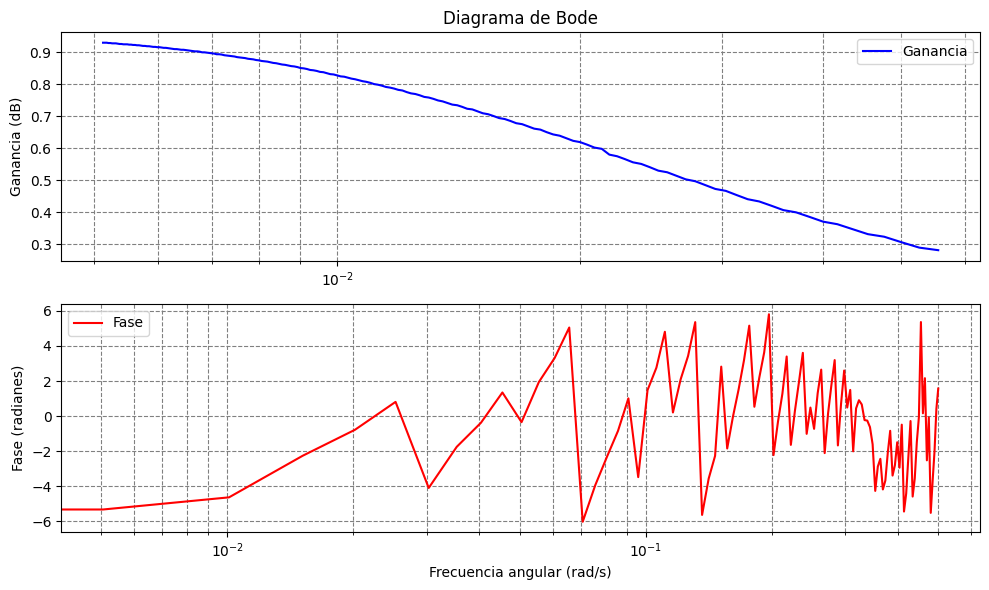

In [287]:
Ganancia = []
Fase = []
FrecuenciaAngu = []
FrecuenciaAnguModulo = []
FrecuenciaAngularPlotear =[]
Frecuencia = []
for i in Tiempo:
    Frecuencia.append(1/i)

# Variables simuladas para los datos. Reemplazar con las reales de tu notebook.



# Cálculo de la ganancia
#Ganancia = [20 * np.log10(mf / mf_in) for mf, mf_in in zip(ModuloFuncionCondensador, ModuloFuente)]

Ganancia = [(mf / mf_in) for mf, mf_in in zip(VoltajeCondensador, VoltajeFuenteLista)]

Fase = [fase_out - fase_in for fase_out, fase_in in zip(FaseFuncionCondensador, FaseFuente)]


# Transformar frecuencia lineal a angular
FrecuenciaAngu = 2 * np.pi * frec

# Graficar el diagrama de Bode
plt.figure(figsize=(10, 6))

# Gráfica de ganancia
plt.subplot(2, 1, 1)
plt.semilogx(Frecuencia, Ganancia, label="Ganancia", color="blue")
plt.title("Diagrama de Bode")
plt.ylabel("Ganancia (dB)")
plt.grid(True, which="both", linestyle="--", color="gray")
plt.legend()

# Gráfica de fase
plt.subplot(2, 1, 2)
plt.semilogx(frec, Fase, label="Fase", color="red")
plt.ylabel("Fase (radianes)")
plt.xlabel("Frecuencia angular (rad/s)")
plt.grid(True, which="both", linestyle="--", color="gray")
plt.legend()

plt.tight_layout()
plt.show()